# 数据分析

In [40]:
# 导库
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [41]:
# 读取数据
data = pd.read_csv('composition_vs_domain.csv', header=0)

In [42]:
data

,model_type,feature_type,cluster,MSE,MAE,e_type
0,linear regression,composition_based,0,133.46,3.77,electronic
1,decision tree,composition_based,0,190.48,2.72,electronic
2,random forest,composition_based,0,117.65,2.40,electronic
3,neural network,composition_based,0,111.36,2.08,electronic
4,linear regression,physical_based,0,127.57,3.67,electronic
5,decision tree,physical_based,0,178.28,2.36,electronic
6,random forest,physical_based,0,105.00,1.94,electronic
7,neural network,physical_based,0,173.66,2.83,electronic
8,linear regression,composition_based,0,2625.26,12.86,ionic
9,decision tree,composition_based,0,2494.52,10.50,ionic


## 查看各个模型的MSE, MAE

- 未进行聚类前

In [51]:
df1 = data[(data['e_type'] == "electronic") & (data['cluster'] == 0)]
df1

,model_type,feature_type,cluster,MSE,MAE,e_type
0,linear regression,composition_based,0,133.46,3.77,electronic
1,decision tree,composition_based,0,190.48,2.72,electronic
2,random forest,composition_based,0,117.65,2.40,electronic
3,neural network,composition_based,0,111.36,2.08,electronic
4,linear regression,physical_based,0,127.57,3.67,electronic
5,decision tree,physical_based,0,178.28,2.36,electronic
6,random forest,physical_based,0,105.00,1.94,electronic
7,neural network,physical_based,0,173.66,2.83,electronic


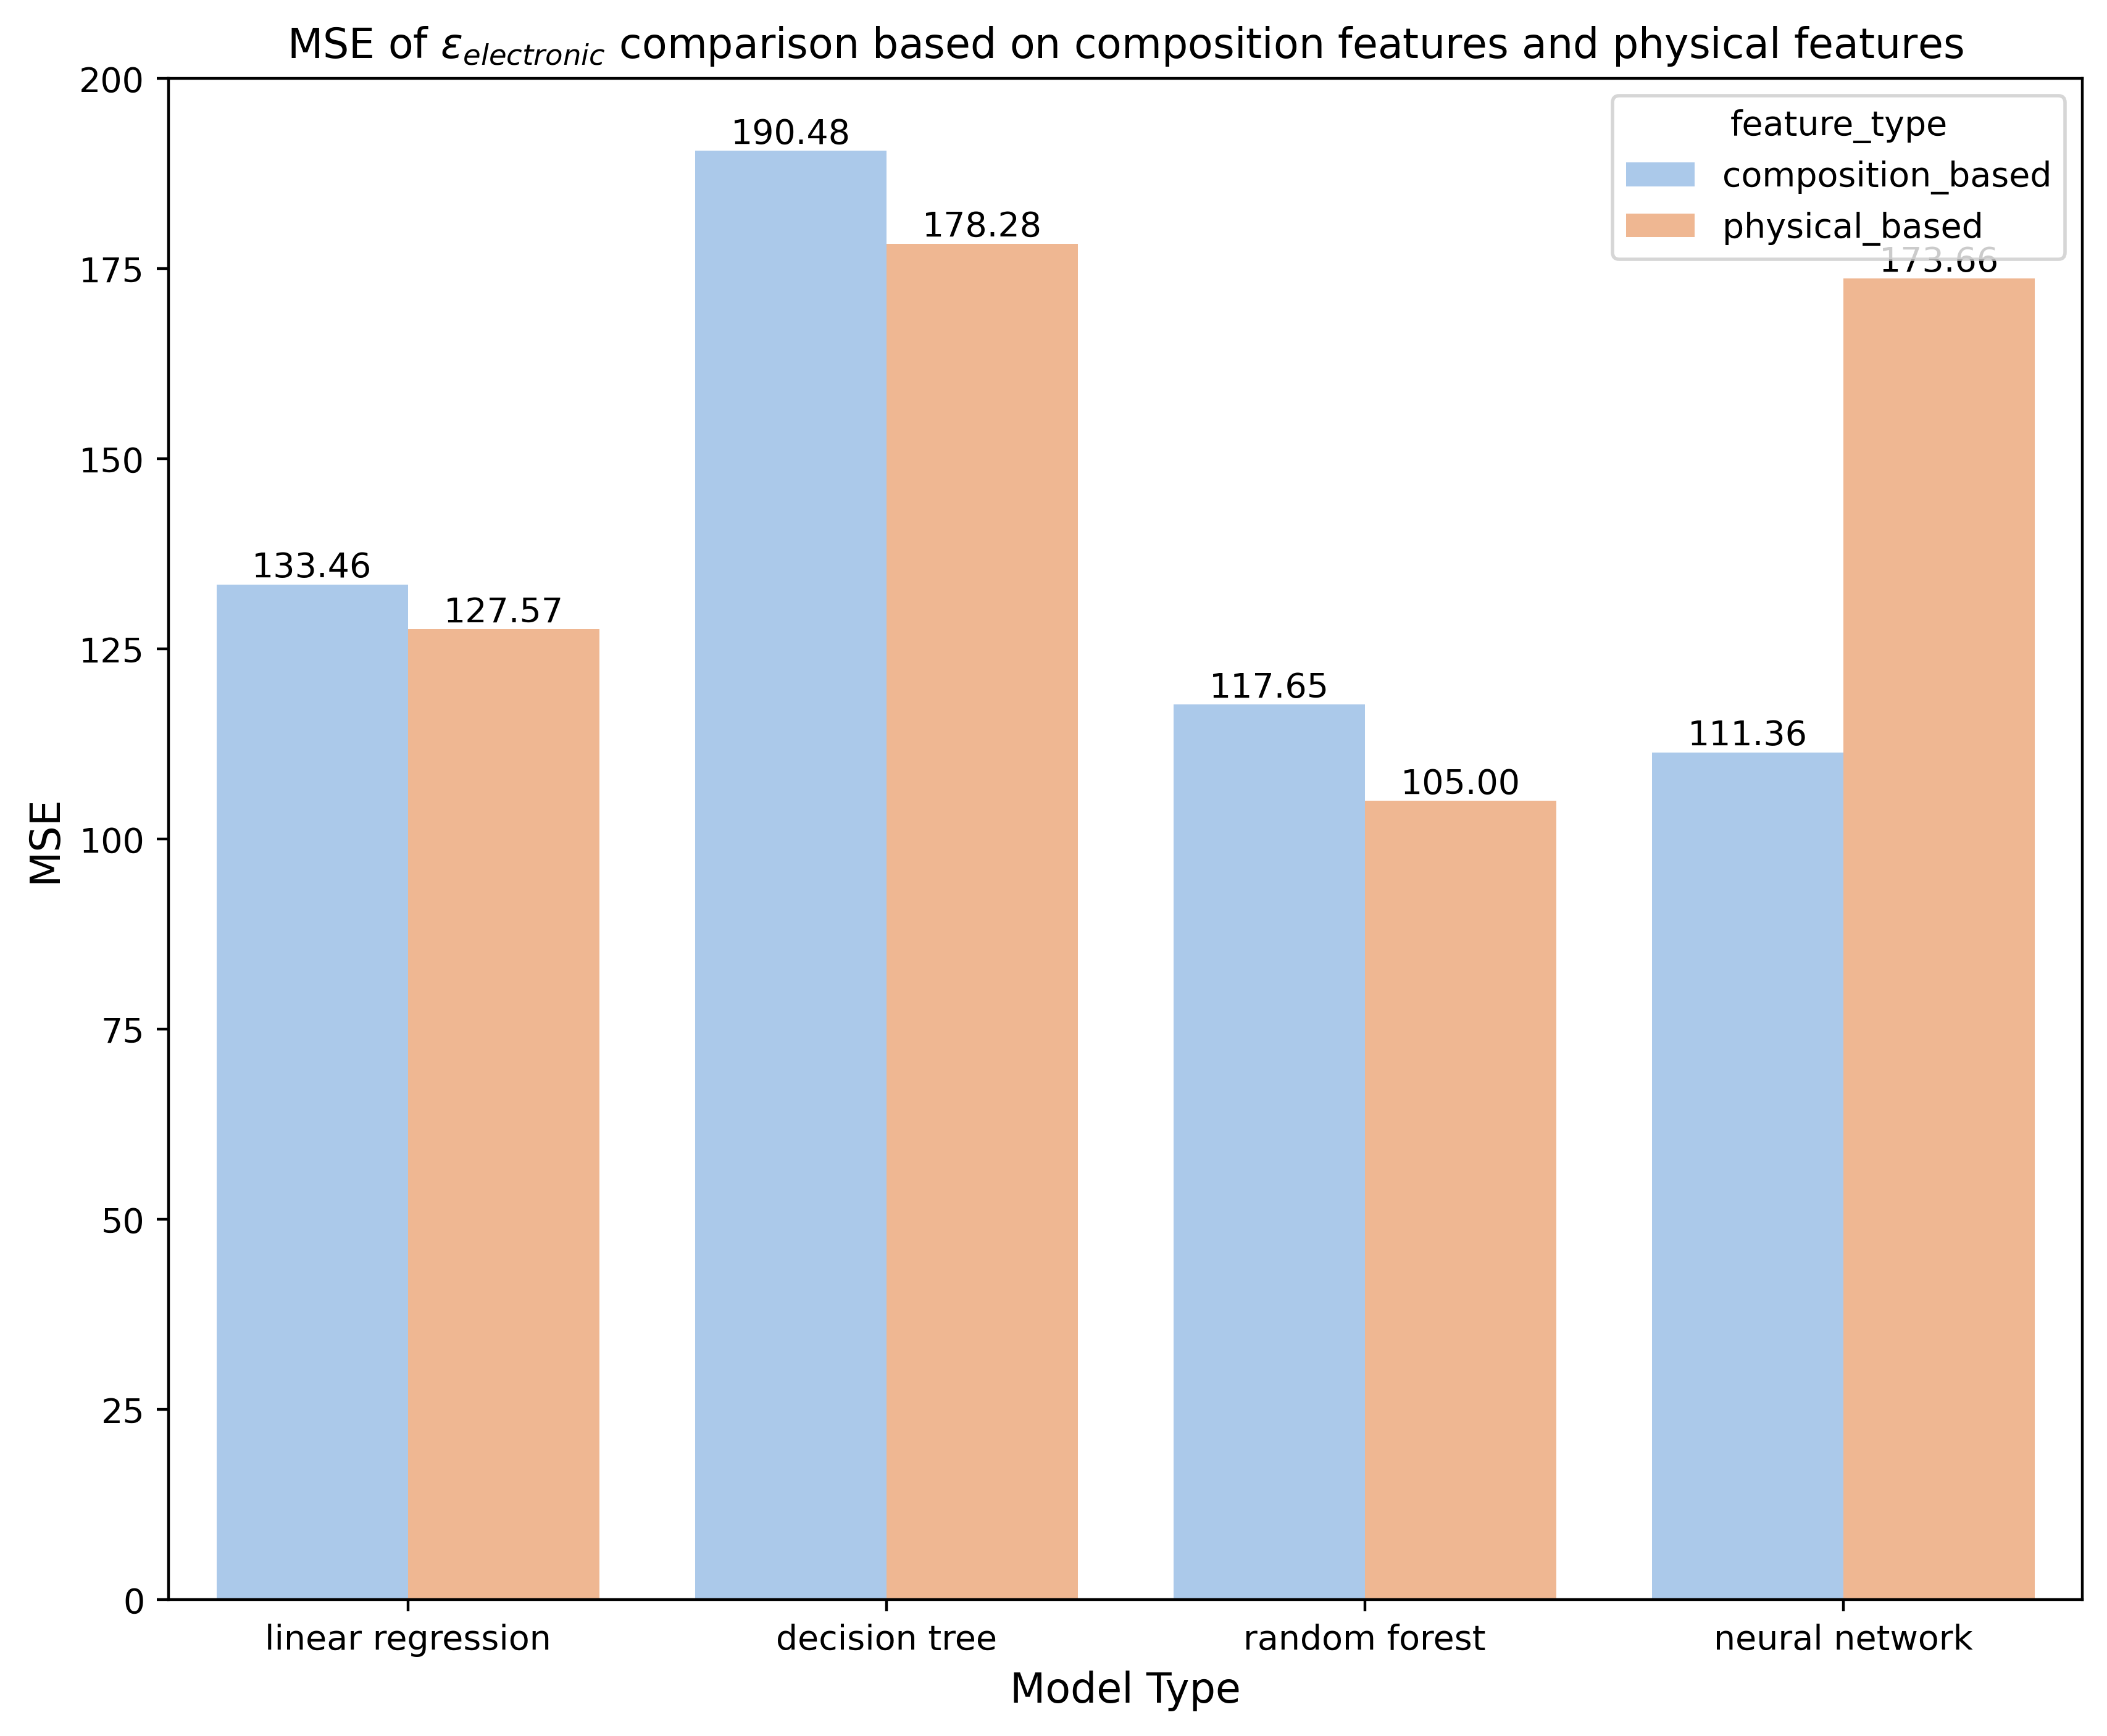

In [52]:
plt.figure(figsize=(10, 8), dpi=400)
sns.barplot(x='model_type', y='MSE', data=df1, palette='pastel', hue='feature_type')
# 基于组分特征和基于物理特征的MAE对比 translation：MAE comparison based on composition features and physical features
plt.title('MSE of $\epsilon_{electronic}$ comparison based on composition features and physical features')
plt.ylabel('MSE', size=12)
plt.xlabel('Model Type', size=12)
# 在柱状图上显示数值
for x, y in enumerate(df1['MSE'][0:4]):
    plt.text(x-0.2, y, '%.2f' % y, ha='center', va='bottom')
for x, y in enumerate(df1['MSE'][4:8]):
    plt.text(x+0.2, y, '%.2f' % y, ha='center', va='bottom')

In [45]:
# 对比聚类和未聚类模型
# 是否聚类了 translation：Whether clustering
df_2 = data[(data['e_type'] == 'electronic')& (data['feature_type'] == 'physical_based')]
df_2['whether clustered'] = df_2['cluster'].apply(lambda x: x==1)
df_2

C:\Users\Fortyfour\AppData\Local\Temp\ipykernel_18796\3810189564.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['whether clustered'] = df_2['cluster'].apply(lambda x: x==1)


,model_type,feature_type,cluster,MSE,MAE,e_type,whether clustered
4,linear regression,physical_based,0,127.57,3.67,electronic,False
5,decision tree,physical_based,0,178.28,2.36,electronic,False
6,random forest,physical_based,0,105.00,1.94,electronic,False
7,neural network,physical_based,0,173.66,2.83,electronic,False
24,linear regression,physical_based,1,110.27,2.55,electronic,True
25,decision tree,physical_based,1,175.61,2.37,electronic,True
26,random forest,physical_based,1,93.31,2.02,electronic,True


In [46]:
df_2.drop(index=7, inplace=True)

C:\Users\Fortyfour\AppData\Local\Temp\ipykernel_18796\2952287846.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2.drop(index=7, inplace=True)


In [47]:
df_2

,model_type,feature_type,cluster,MSE,MAE,e_type,whether clustered
4,linear regression,physical_based,0,127.57,3.67,electronic,False
5,decision tree,physical_based,0,178.28,2.36,electronic,False
6,random forest,physical_based,0,105.00,1.94,electronic,False
24,linear regression,physical_based,1,110.27,2.55,electronic,True
25,decision tree,physical_based,1,175.61,2.37,electronic,True
26,random forest,physical_based,1,93.31,2.02,electronic,True


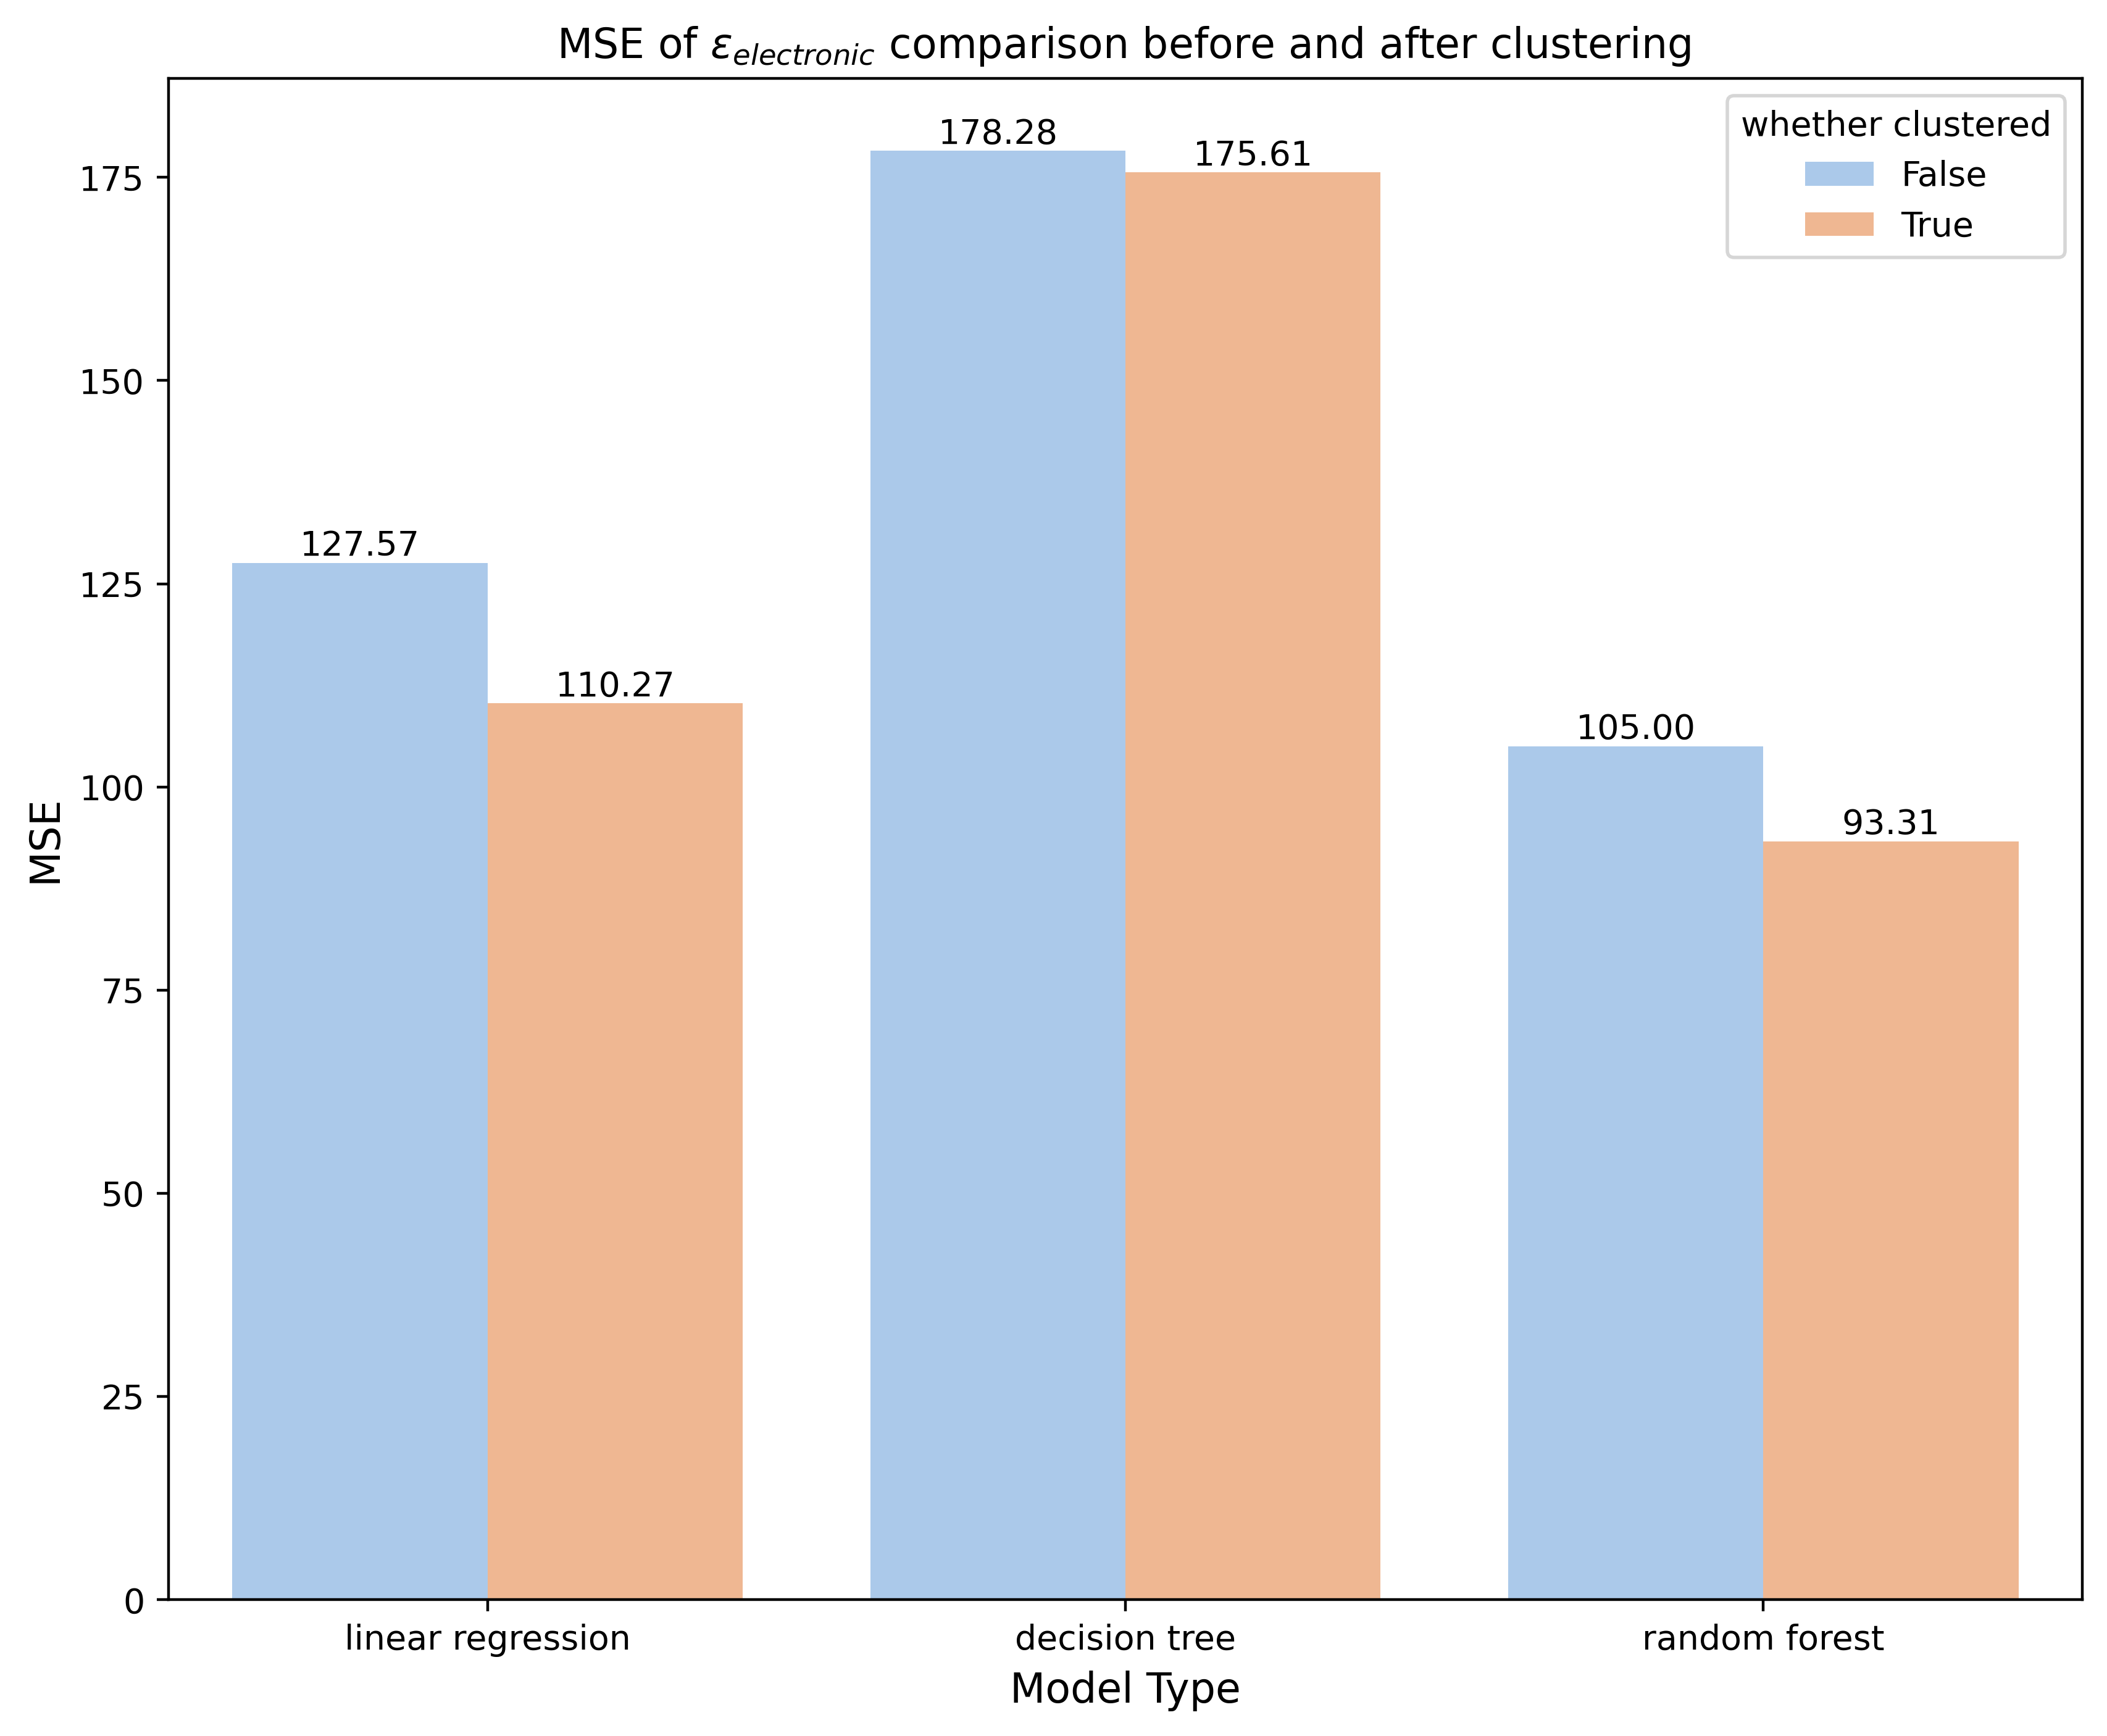

In [48]:
plt.figure(figsize=(10, 8), dpi=400)
sns.barplot(x='model_type', y='MSE', data=df_2, palette='pastel', hue='whether clustered')
# 基于组分特征和基于物理特征的MAE对比 translation：MAE comparison based on composition features and physical features
# 在聚类前和聚类后的MSE对比 translation：MSE comparison before and after clustering
plt.title('MSE of $\epsilon_{electronic}$ comparison before and after clustering ')
plt.ylabel('MSE', size=12)
plt.xlabel('Model Type', size=12)
# 在柱状图上显示数值
for x, y in enumerate(df_2['MSE'][0:3]):
    plt.text(x-0.2, y, '%.2f' % y, ha='center', va='bottom')
for x, y in enumerate(df_2['MSE'][3:6]):
    plt.text(x+0.2, y, '%.2f' % y, ha='center', va='bottom')